# Data analysis and preprocessing

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Shape of the DataFrame:
(891, 12)

Columns in the DataFrame:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Data types of the columns:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
d

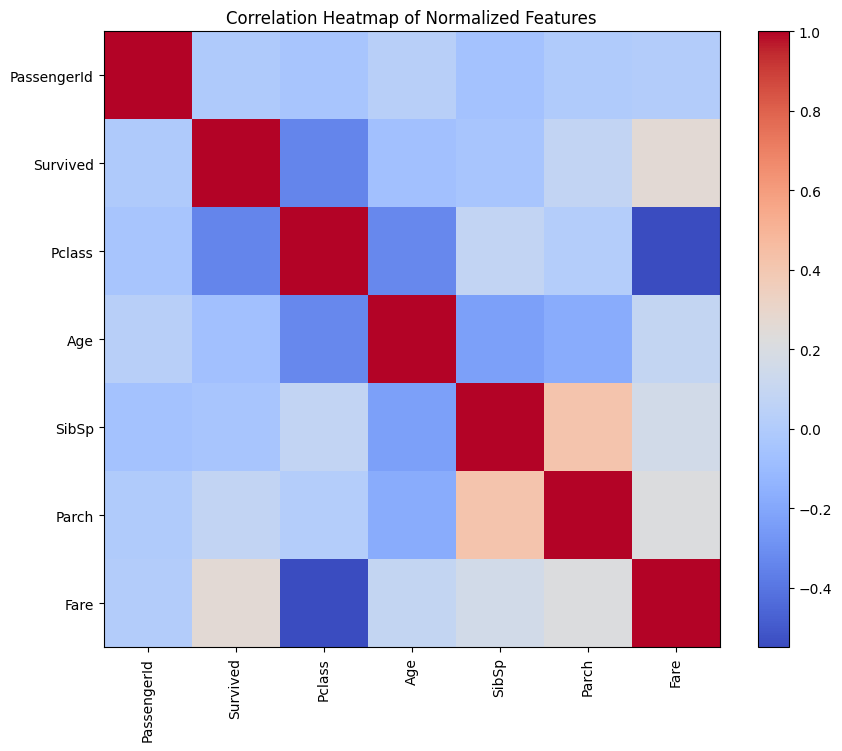

Correlation of the features with 'Survived' (absolute values):
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.069809
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf

file_train = "train.csv"
file_test = "test.csv"

data_train = pd.read_csv(file_train, sep=',')
data_test = pd.read_csv(file_test, sep=',')
display(data_train.head())

print("Shape of the DataFrame:")
print(data_train.shape)
print("\nColumns in the DataFrame:")
print(data_train.columns)

print("\nData types of the columns:")
print(data_train.dtypes)

print("\nMissing Values:")
print(data_train.isnull().sum())
print(data_test.isnull().sum())

print("\nDuplicate Rows:")
print(data_train.duplicated().sum())
print(data_test.duplicated().sum())

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

imputer_numeric = SimpleImputer(strategy='mean')
data_train['Age'] = imputer_numeric.fit_transform(data_train[['Age']])[:, 0]
data_train['Fare'] = imputer_numeric.fit_transform(data_train[['Fare']])[:, 0]
data_test['Age'] = imputer_numeric.fit_transform(data_test[['Age']])[:, 0]
data_test['Fare'] = imputer_numeric.fit_transform(data_test[['Fare']])[:, 0]

imputer_categorical = SimpleImputer(strategy='most_frequent')
data_train['Embarked'] = imputer_categorical.fit_transform(data_train[['Embarked']])[:, 0]
data_test['Embarked'] = imputer_categorical.fit_transform(data_test[['Embarked']])[:, 0]

numerical_columns = data_train.select_dtypes(include=['int64', 'float64'])
correlations = numerical_columns.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlations, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlations)), correlations.columns, rotation=90)
plt.yticks(range(len(correlations)), correlations.columns)
plt.title('Correlation Heatmap of Normalized Features')
plt.show()

survived_correlations = correlations['Survived']
correlated_abs = survived_correlations.drop('Survived').abs().sort_values(ascending=False)
print("Correlation of the features with 'Survived' (absolute values):")
print(correlated_abs)

# Machine Learning

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score

data_train = pd.get_dummies(data_train, columns=['Sex', 'Embarked'], drop_first=True)
data_test = pd.get_dummies(data_test, columns=['Sex', 'Embarked'], drop_first=True)
features = ['Pclass', 'Fare', 'Parch', 'Age', 'SibSp', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = data_train[features]
y = data_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


X_test = data_test[features]
y_pred = model.predict(X_test)

submission = pd.DataFrame({
    'PassengerId': data_test['PassengerId'],
    'Survived': y_pred
})
submission.to_csv('submission_ML.csv', index=False)

y_pred = model.predict(X_test)


Accuracy: 0.8044692737430168
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       110
           1       0.75      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
 [[93 17]
 [18 51]]


# Artificial Neural Network

In [ ]:
from keras import layers, Model
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

X = data_train.drop(columns=['Survived'])
y = data_train['Survived']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from keras.layers import Dropout

model = Sequential()
model.add(Dense(units=512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping], verbose=1)

y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.5312 - loss: 0.9772 - val_accuracy: 0.6704 - val_loss: 0.6780
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.5306 - loss: 0.8231 - val_accuracy: 0.6089 - val_loss: 0.6814
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6393 - loss: 0.6766 - val_accuracy: 0.6425 - val_loss: 0.6722
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.6517 - loss: 0.6278 - val_accuracy: 0.7039 - val_loss: 0.6553
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7425 - loss: 0.5078 - val_accuracy: 0.7151 - val_loss: 0.6358
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.7468 - loss: 0.4658 - val_accuracy: 0.7933 - val_loss: 0.6029
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8622 - loss: 0.3516 - val_accuracy: 0.8156 - val_loss: 0.5571
Epoch 8/50
 8/12 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8873 - loss: 0.2813

In [ ]:
X_submission = data_test.drop(columns=['PassengerId'])
X_submission = pd.get_dummies(X_submission, drop_first=True)

missing_cols = set(X_train.columns) - set(X_submission.columns)
for col in missing_cols:
    X_submission[col] = 0

X_submission = X_submission[X_train.columns]

X_submission_scaled = scaler.transform(X_submission)

y_submission_prob = model.predict(X_submission_scaled)
y_submission = (y_submission_prob > 0.5).astype(int).flatten()

submission = pd.DataFrame({
    'PassengerId': data_test['PassengerId'],
    'Survived': y_submission
})
submission.to_csv('submission_ANN.csv', index=False)

print("Submission file generated: submission_ANN.csv")

In [ ]:
submission_ml = pd.read_csv('submission_ML.csv')
submission_ann = pd.read_csv('submission_ANN.csv')

if not submission_ml['PassengerId'].equals(submission_ann['PassengerId']):
    raise ValueError("Les fichiers de soumission n'ont pas les mêmes PassengerId.")

differences = (submission_ml['Survived'] != submission_ann['Survived']).sum()

print(f"Nombre de différences entre les deux modèles : {differences}")
